### Algoritmo de Grover 
Autor: Camilo Andrés Quintero Rodriguez

### Para las clausulas con variables xyz 


Total count for 00 and 11 are: {'000': 179, '110': 180, '001': 192, '111': 230, '011': 206, '101': 4, '010': 7, '100': 2}
     ┌───┐     ┌──────┐┌───┐┌──────┐┌───┐┌──────┐┌───┐┌──────┐┌───┐┌─┐      
q_0: ┤ H ├─────┤0     ├┤ H ├┤0     ├┤ H ├┤0     ├┤ H ├┤0     ├┤ H ├┤M├──────
     ├───┤     │      │├───┤│      │├───┤│      │├───┤│      │├───┤└╥┘┌─┐   
q_1: ┤ H ├─────┤1     ├┤ H ├┤1     ├┤ H ├┤1     ├┤ H ├┤1     ├┤ H ├─╫─┤M├───
     ├───┤     │  Uf1 │├───┤│  Uor │├───┤│  Uf1 │├───┤│  Uor │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2     ├┤ H ├┤2     ├┤ H ├┤2     ├┤ H ├┤2     ├┤ H ├─╫──╫─┤M├
     ├───┤┌───┐│      │└───┘│      │└───┘│      │└───┘│      │└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3     ├─────┤3     ├─────┤3     ├─────┤3     ├──────╫──╫──╫─
     └───┘└───┘└──────┘     └──────┘     └──────┘     └──────┘      ║  ║  ║ 
c: 3/═══════════════════════════════════════════════════════════════╩══╩══╩═
                                                                    0  1  2 


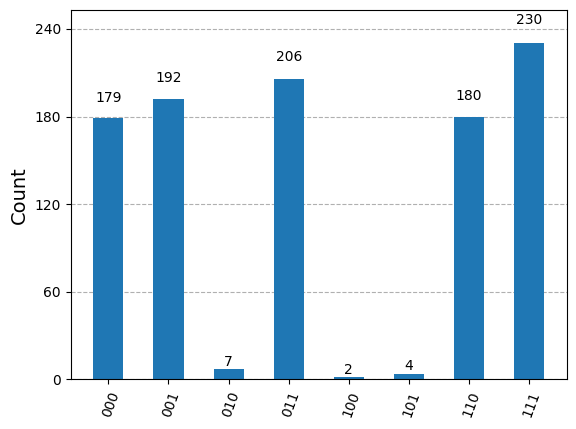

In [28]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
gate uf a, b, c, d {
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  x a;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x b;
  x c;
  x b;
  c3x a, b, c, d;
  x b;
  c3x a, b, c, d;
}
gate uor a, b, c, d {
  x a;
  x b;
  c3x a, b, c, d;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
}
gate uf1 a, b, c, d {
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  x a;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x b;
  x c;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
}

qreg q[4];
creg c[3];

h q[0];
h q[1];
h q[2];
x q[3];
h q[3];
uf1 q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uor q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uf1 q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uor q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];

// @columns [0,0,0,0,1,2,3,3,3,4,5,5,5,6,7,7,7,8,9,9,9,10,11,12]

"""
circuit = QuantumCircuit.from_qasm_str(qasm)


compiled_circuit = transpile(circuit, simulator)


job = simulator.run(compiled_circuit, shots=1000)
# Grab results from the job
result = job.result()
# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)
print (circuit)


plot_histogram(counts)


### Para las clausulas con variables abc


Total count for 00 and 11 are: {'111': 193, '101': 185, '000': 191, '010': 10, '001': 189, '110': 216, '011': 10, '100': 6}
     ┌───┐     ┌─────┐┌───┐┌──────┐┌───┐┌─────┐┌───┐┌──────┐┌───┐┌─┐      
q_0: ┤ H ├─────┤0    ├┤ H ├┤0     ├┤ H ├┤0    ├┤ H ├┤0     ├┤ H ├┤M├──────
     ├───┤     │     │├───┤│      │├───┤│     │├───┤│      │├───┤└╥┘┌─┐   
q_1: ┤ H ├─────┤1    ├┤ H ├┤1     ├┤ H ├┤1    ├┤ H ├┤1     ├┤ H ├─╫─┤M├───
     ├───┤     │  Uf │├───┤│  Uor │├───┤│  Uf │├───┤│  Uor │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2    ├┤ H ├┤2     ├┤ H ├┤2    ├┤ H ├┤2     ├┤ H ├─╫──╫─┤M├
     ├───┤┌───┐│     │└───┘│      │└───┘│     │└───┘│      │└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3    ├─────┤3     ├─────┤3    ├─────┤3     ├──────╫──╫──╫─
     └───┘└───┘└─────┘     └──────┘     └─────┘     └──────┘      ║  ║  ║ 
c: 3/═════════════════════════════════════════════════════════════╩══╩══╩═
                                                                  0  1  2 


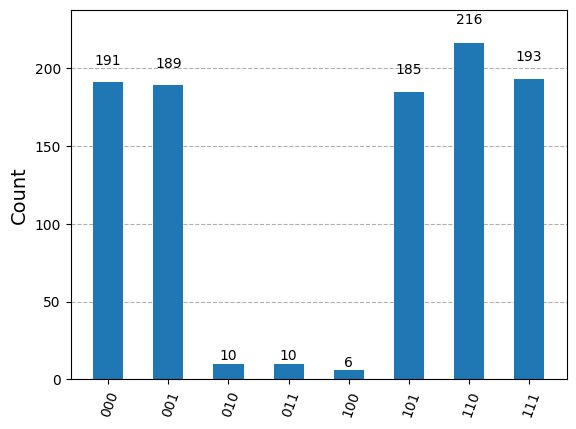

In [27]:


import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
simulator = Aer.get_backend('qasm_simulator')
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
gate uf a, b, c, d {
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  x a;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x b;
  x c;
  x b;
  c3x a, b, c, d;
  x b;
  c3x a, b, c, d;
}
gate uor a, b, c, d {
  x a;
  x b;
  c3x a, b, c, d;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
}

qreg q[4];
creg c[3];

h q[0];
h q[1];
h q[2];
x q[3];
h q[3];
uf q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uor q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uf q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uor q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];

// @columns [0,0,0,0,1,2,3,3,3,4,5,5,5,6,7,7,7,8,9,9,9,10,11,12]

"""
circuit = QuantumCircuit.from_qasm_str(qasm)


compiled_circuit = transpile(circuit, simulator)


job = simulator.run(compiled_circuit, shots=1000)
# Grab results from the job
result = job.result()
# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)
print (circuit)


plot_histogram(counts)

### Para las clausulas con variables pqr


Total count for 00 and 11 are: {'000': 211, '101': 174, '110': 194, '111': 200, '011': 191, '100': 15, '001': 10, '010': 5}
     ┌───┐     ┌──────┐┌───┐┌──────┐┌───┐┌──────┐┌───┐┌──────┐┌───┐┌─┐      
q_0: ┤ H ├─────┤0     ├┤ H ├┤0     ├┤ H ├┤0     ├┤ H ├┤0     ├┤ H ├┤M├──────
     ├───┤     │      │├───┤│      │├───┤│      │├───┤│      │├───┤└╥┘┌─┐   
q_1: ┤ H ├─────┤1     ├┤ H ├┤1     ├┤ H ├┤1     ├┤ H ├┤1     ├┤ H ├─╫─┤M├───
     ├───┤     │  Uf3 │├───┤│  Uor │├───┤│  Uf3 │├───┤│  Uor │├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─────┤2     ├┤ H ├┤2     ├┤ H ├┤2     ├┤ H ├┤2     ├┤ H ├─╫──╫─┤M├
     ├───┤┌───┐│      │└───┘│      │└───┘│      │└───┘│      │└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤3     ├─────┤3     ├─────┤3     ├─────┤3     ├──────╫──╫──╫─
     └───┘└───┘└──────┘     └──────┘     └──────┘     └──────┘      ║  ║  ║ 
c: 3/═══════════════════════════════════════════════════════════════╩══╩══╩═
                                                                    0  1  2 


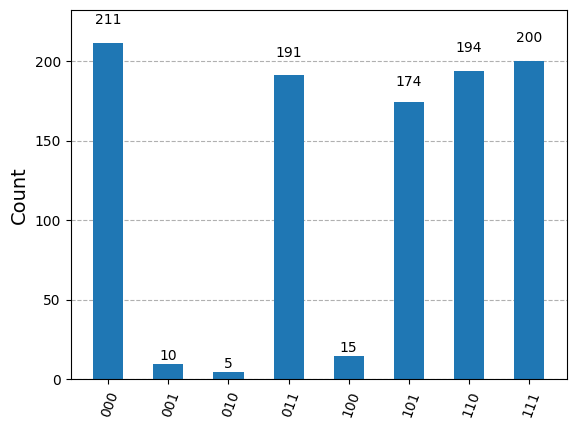

In [29]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
simulator = Aer.get_backend('qasm_simulator')
from qiskit import QuantumCircuit
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
gate uf a, b, c, d {
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  x a;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x b;
  x c;
  x b;
  c3x a, b, c, d;
  x b;
  c3x a, b, c, d;
}
gate uor a, b, c, d {
  x a;
  x b;
  c3x a, b, c, d;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
}
gate uf1 a, b, c, d {
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  x a;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x b;
  x c;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
}
gate uf3 a, b, c, d {
  x a;
  x b;
  x c;
  c3x a, b, c, d;
  x a;
  x b;
  x c;
  x a;
  c3x a, b, c, d;
  x a;
  x b;
  c3x a, b, c, d;
  x b;
  x c;
  c3x a, b, c, d;
  x c;
  c3x a, b, c, d;
}

qreg q[4];
creg c[3];

h q[0];
h q[1];
h q[2];
x q[3];
h q[3];
uf3 q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uor q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uf3 q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
uor q[0], q[1], q[2], q[3];
h q[0];
h q[1];
h q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];

// @columns [0,0,0,0,1,2,3,3,3,4,5,5,5,6,7,7,7,8,9,9,9,10,11,12]

"""
circuit = QuantumCircuit.from_qasm_str(qasm)
compiled_circuit = transpile(circuit, simulator)


job = simulator.run(compiled_circuit, shots=1000)
# Grab results from the job
result = job.result()
# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)
print (circuit)


plot_histogram(counts)